In [2]:
import pandas  as pa
critic = pa.read_csv('data/P4-Movie-Ratings.csv')
critic.columns = ['Film','Genre','RottenRatings','AudienceRatings','Budget','YearOfRelease']
critic['Genre'] = critic['Genre'].astype('category')


In [6]:
from matplotlib import pyplot as plt
import seaborn as sbs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot') # changing the type of plot
plt.rcParams["legend.facecolor"] = 'grey'
plt.rcParams["legend.edgecolor"] = 'brown'

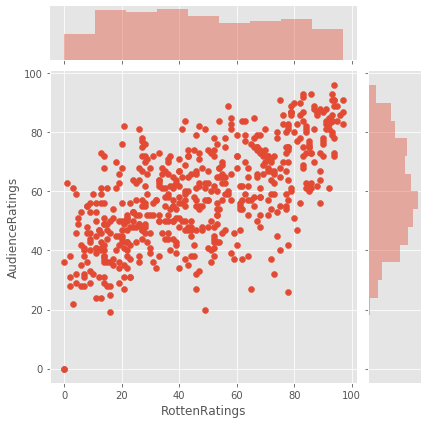

In [11]:
j = sbs.jointplot(data=critic, x='RottenRatings',y='AudienceRatings')

In [15]:
j = sbs.jointplot(data=critic, x='RottenRatings',y='AudienceRatings',kind='kde')

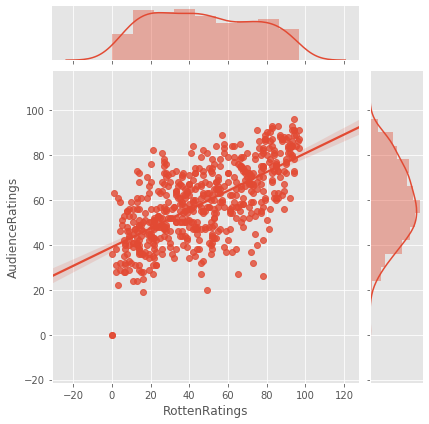

In [16]:
j = sbs.jointplot(data=critic, x='RottenRatings',y='AudienceRatings',kind='reg')

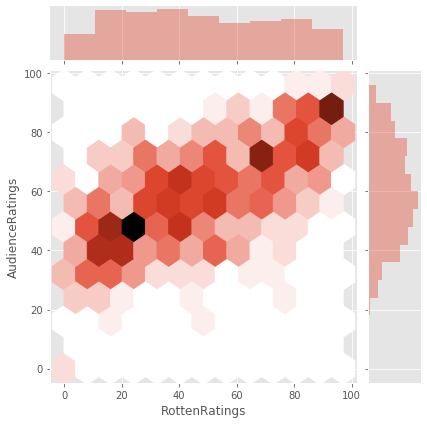

In [17]:
j = sbs.jointplot(data=critic, x='RottenRatings',y='AudienceRatings',kind='hex')

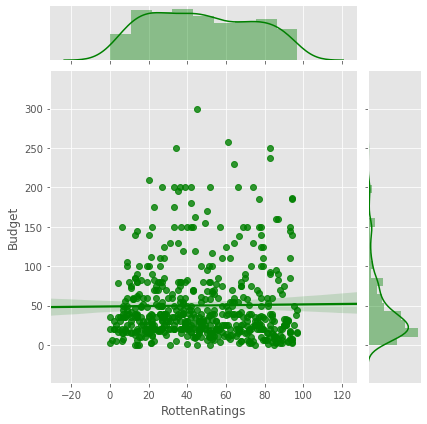

In [27]:
j = sbs.jointplot(data=critic, x='RottenRatings',y='Budget',kind='reg',color='g')

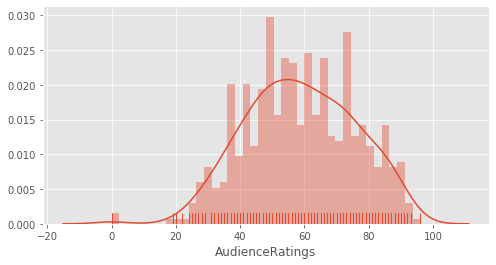

In [35]:
hist = sbs.distplot(critic.AudienceRatings,rug=True,bins=40)

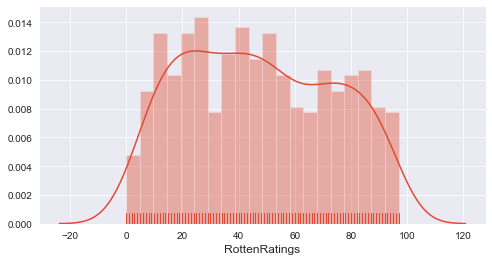

In [49]:
sbs.set_style("darkgrid")
hist1 = sbs.distplot(critic.RottenRatings,rug=True,bins=20)

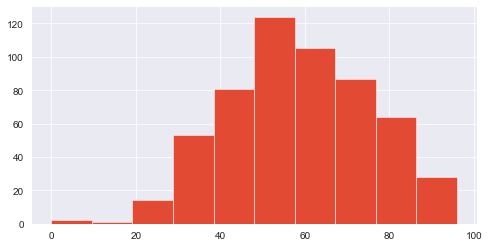

In [47]:
sbs.set_style("darkgrid")
h1 = plt.hist(critic.AudienceRatings)

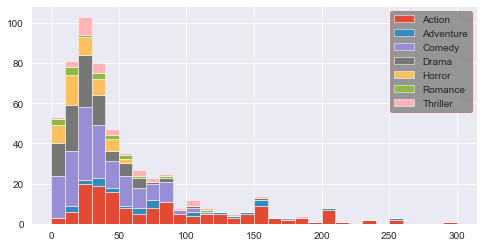

In [79]:
def histGenere(data,genere):
    genlist = []
    for type in genere:
        genlist.append(data[data['Genre']==type].Budget)
    myhist = plt.hist(genlist,stacked=True,label=genere,bins=30,rwidth=1)
    plt.legend()
    

histGenere(critic,critic.Genre.cat.categories)
        
        
        

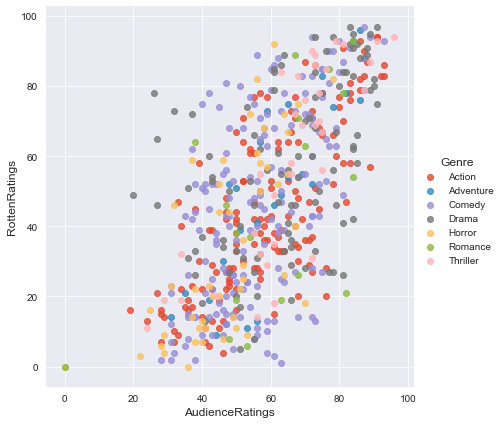

In [88]:
sp = sbs.lmplot(data=critic,x='AudienceRatings',y='RottenRatings',\
                hue='Genre',fit_reg=False,size=6,aspect=1)

In [104]:
# shading
kd1 = sbs.kdeplot(critic.AudienceRatings,critic.RottenRatings,shade=True,\
                  shade_lowest=False,cmap='hot')

# outline
kd1b = sbs.kdeplot(critic.AudienceRatings,critic.RottenRatings,cmap='Reds')

In [109]:
# shading
kd2 = sbs.kdeplot(critic.Budget,critic.RottenRatings,shade=True,\
                  shade_lowest=False,cmap='hot')

# outline
kd2b = sbs.kdeplot(critic.Budget,critic.RottenRatings,cmap='Reds')



In [110]:
# shading
kd3 = sbs.kdeplot(critic.Budget,critic.AudienceRatings,shade=True,\
                  shade_lowest=False,cmap='cool')

# outline
kd3b = sbs.kdeplot(critic.Budget,critic.AudienceRatings,cmap='Blues')

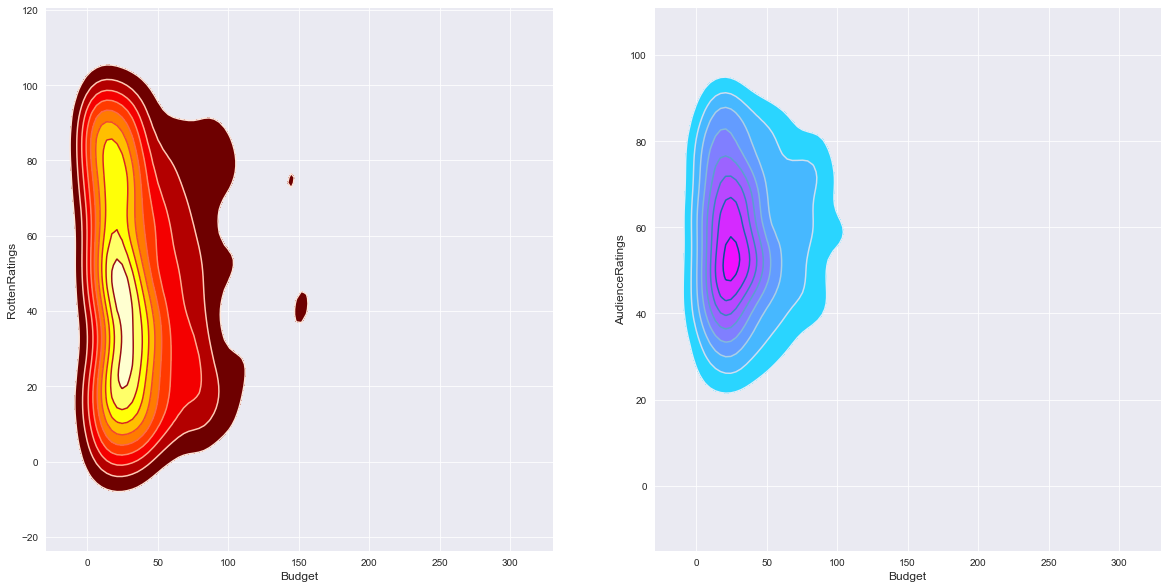

In [114]:
f,ax = plt.subplots(1,2,figsize=(20,10))
kd2 = sbs.kdeplot(critic.Budget,critic.RottenRatings,shade=True,\
                  shade_lowest=False,cmap='hot',ax=ax[0])
# outline
kd2b = sbs.kdeplot(critic.Budget,critic.RottenRatings,cmap='Reds',ax=ax[0])


kd3 = sbs.kdeplot(critic.Budget,critic.AudienceRatings,shade=True,\
                  shade_lowest=False,cmap='cool',ax=ax[1])

# outline
kd3b = sbs.kdeplot(critic.Budget,critic.AudienceRatings,cmap='Blues',ax=ax[1])

[(-30, 170)]

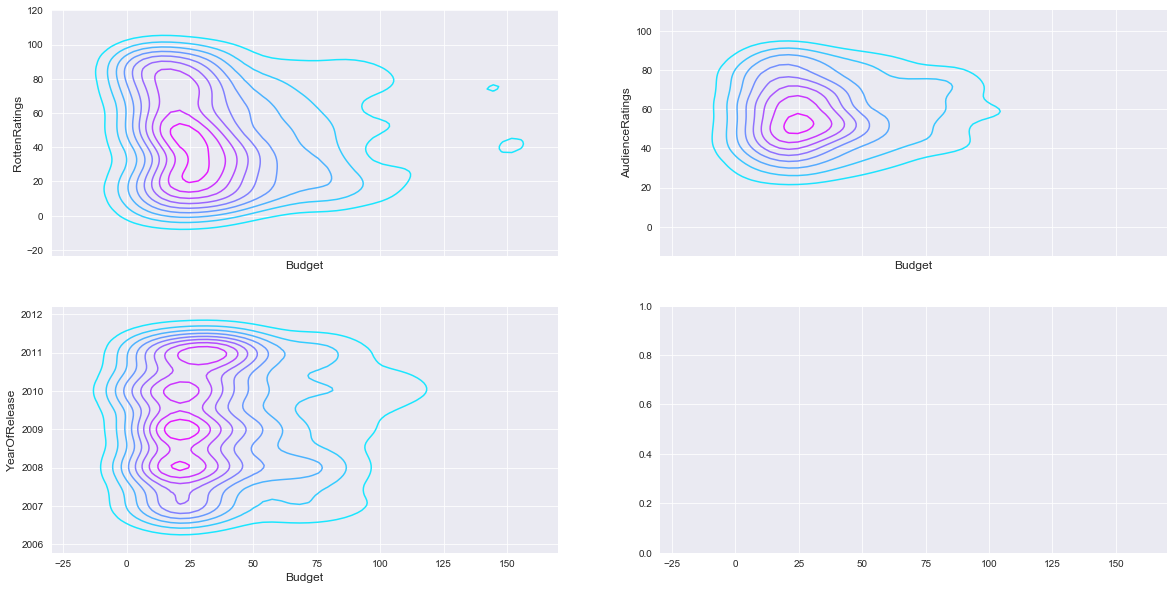

In [132]:
# sharex makes x axis same for all, common changes to all
f,ax = plt.subplots(2,2,figsize=(20,10),sharex=True)
# outline
kd2b = sbs.kdeplot(critic.Budget,critic.RottenRatings,cmap='cool',ax=ax[0,0])
kd3b = sbs.kdeplot(critic.Budget,critic.AudienceRatings,cmap='cool',ax=ax[0,1])
kd4b = sbs.kdeplot(critic.Budget,critic.YearOfRelease,cmap='cool',ax=ax[1,0])
kd2b.set(xlim=(-30,170))

[(-30, 170)]

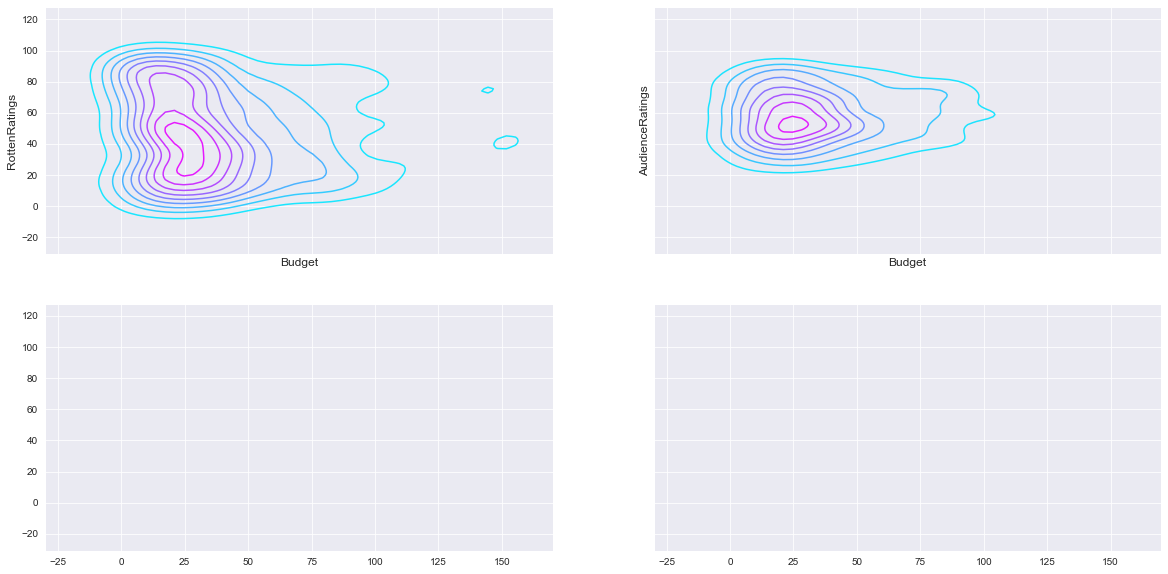

In [131]:
# sharex makes x axis same for all, common changes to all
f,ax = plt.subplots(2,2,figsize=(20,10),sharex=True,sharey=True)
# outline
kd2b = sbs.kdeplot(critic.Budget,critic.RottenRatings,cmap='cool',ax=ax[0,0])
kd3b = sbs.kdeplot(critic.Budget,critic.AudienceRatings,cmap='cool',ax=ax[0,1])
#kd4b = sbs.kdeplot(critic.Budget,critic.YearOfRelease,cmap='cool',ax=ax[1,0])
kd2b.set(xlim=(-30,170))

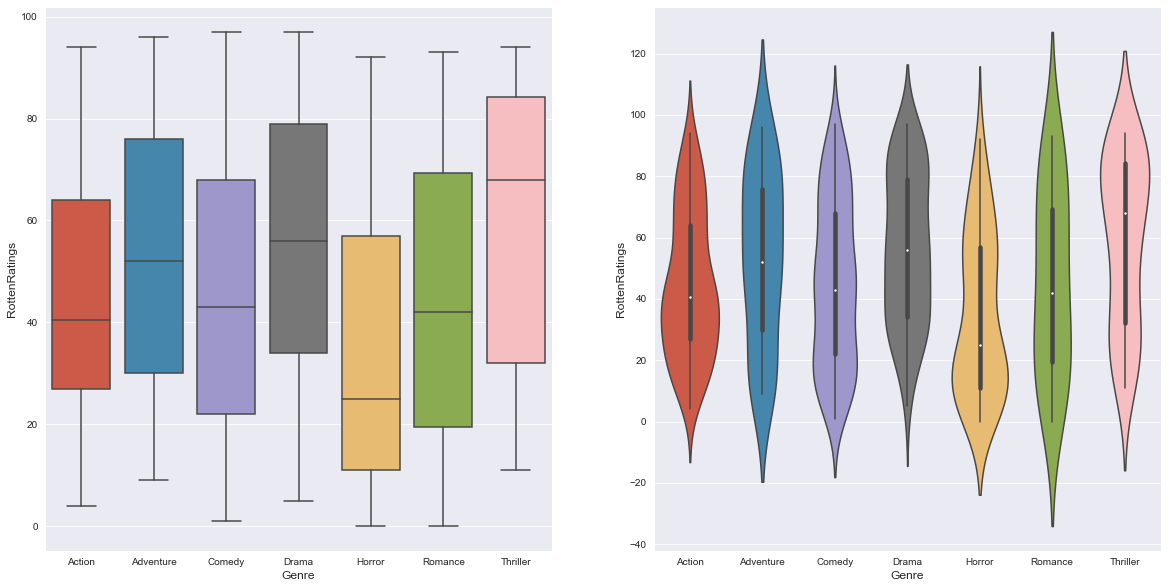

In [141]:
f,ax = plt.subplots(1,2,figsize=(20,10))
b1 = sbs.boxplot(data=critic,x='Genre',y='RottenRatings',ax=ax[0])
b2 = sbs.violinplot(data=critic,x='Genre',y='RottenRatings',ax=ax[1])

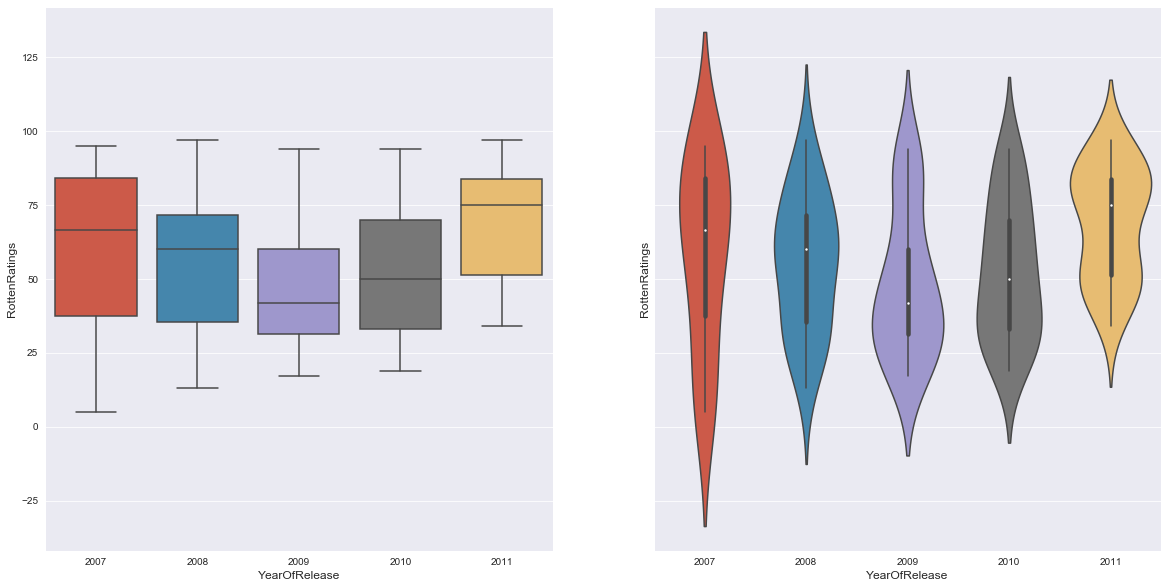

In [147]:
f,ax = plt.subplots(1,2,figsize=(20,10),sharex=True,sharey=True)
b1 = sbs.boxplot(data=critic[critic['Genre']=='Drama'],x='YearOfRelease',y='RottenRatings',ax=ax[0])
b2 = sbs.violinplot(data=critic[critic['Genre']=='Drama'],x='YearOfRelease',y='RottenRatings',ax=ax[1])
# look at 2011 the box plot doesnt show the frequency of values, violin plot shows that

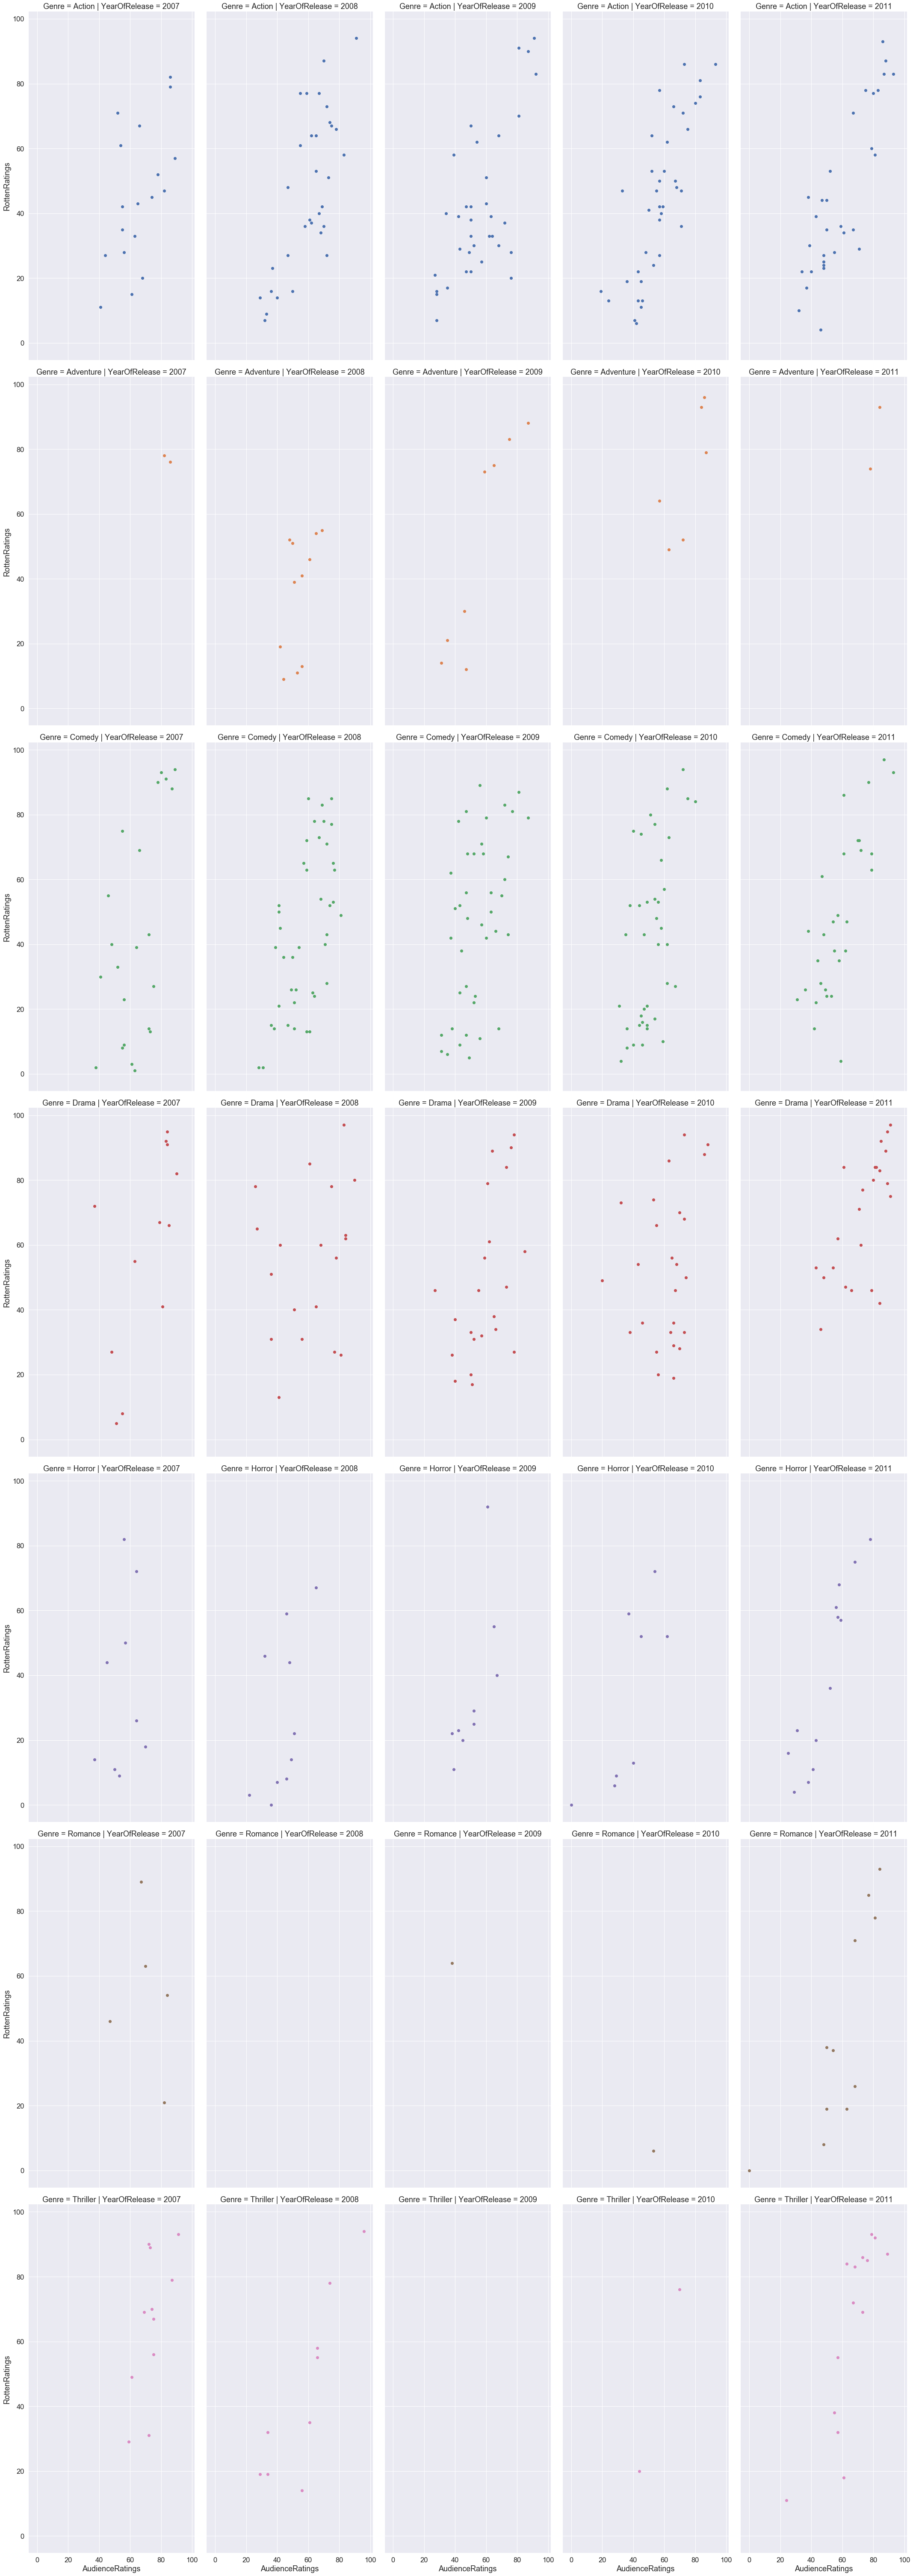

In [67]:
from matplotlib import pyplot as plt
import seaborn as sbs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sbs.set_style('whitegrid')
sbs.set(font_scale=1.5)
fg = sbs.FacetGrid(critic,row='Genre',col='YearOfRelease',hue='Genre',height=12,aspect=0.5)
fg = fg.map(plt.scatter,'AudienceRatings','RottenRatings')

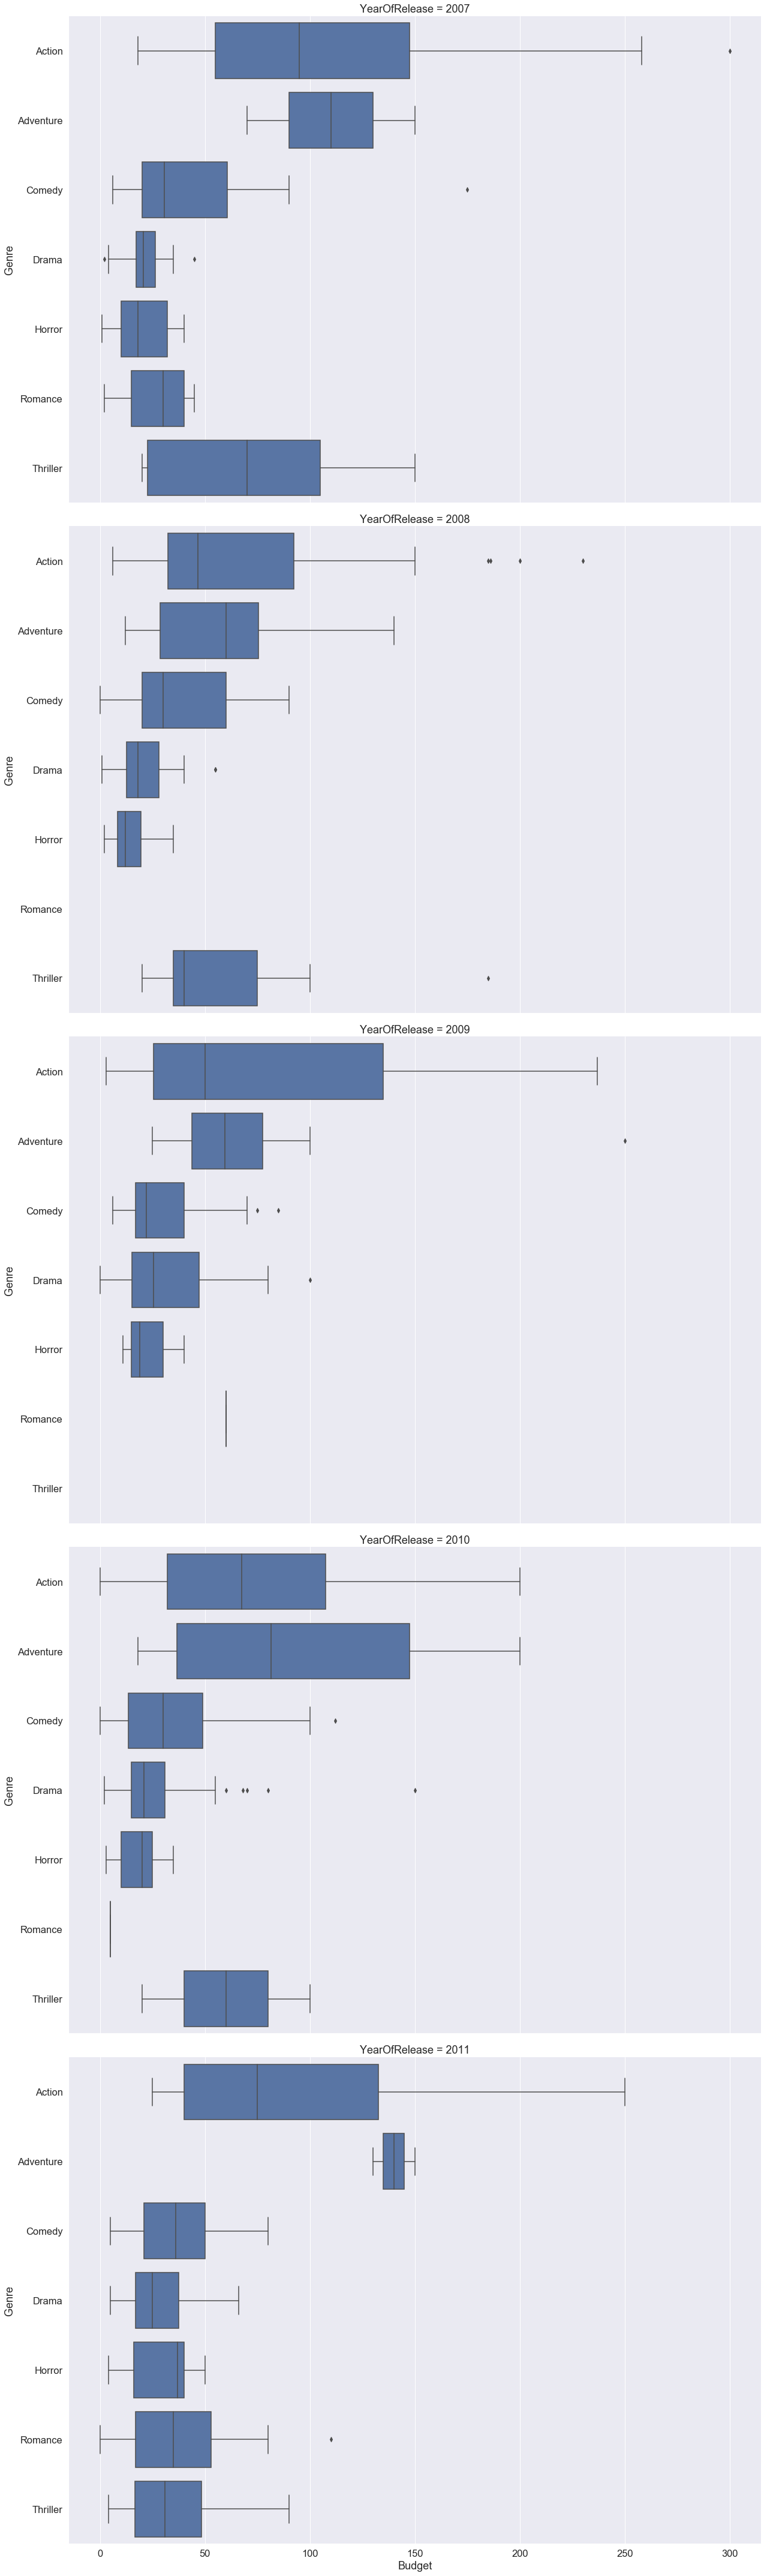

In [85]:
sbs.set_style('whitegrid')
sbs.set(font_scale=1.5)
fg1 = sbs.FacetGrid(critic,row='YearOfRelease',height=12,aspect=1.5)
fg1 = fg1.map(sbs.boxplot,'Budget','Genre')
fg1.add_legend()

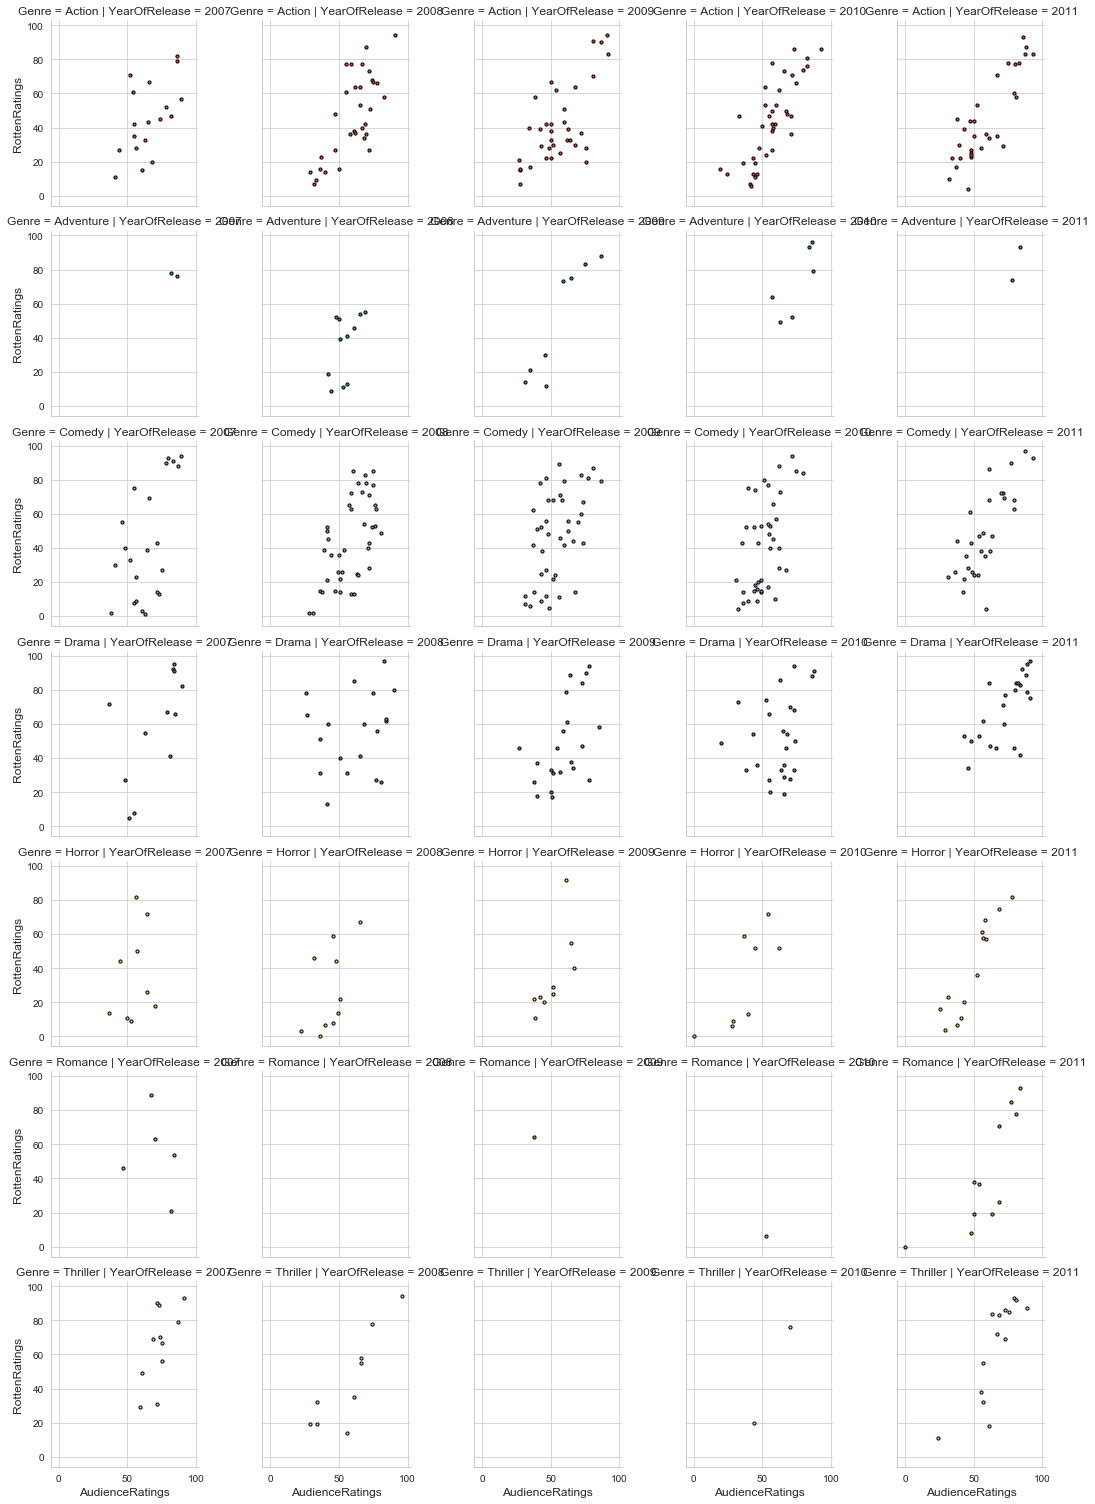

In [23]:
sbs.set_style('whitegrid')
fg = sbs.FacetGrid(critic,row='Genre',col='YearOfRelease',hue='Genre')
kws = dict(s=10,linewidth=1,edgecolor='black')
fg.map(plt.scatter,'AudienceRatings','RottenRatings',**kws)

In [24]:
tips = sbs.load_dataset('tips')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [34]:
t = sbs.FacetGrid(tips,'smoker','sex',sharex=True,sharey=True)
t = t.map(sbs.violinplot,'time','total_bill')

In [53]:
sbs.set(font_scale=1.5)
t = sbs.FacetGrid(tips,col='time',hue='smoker',sharex=True,sharey=True,height=12,aspect=0.5)
t = t.map(plt.scatter,'total_bill','tip')
t.add_legend()

In [60]:
sbs.set(font_scale=1.5)
bp = sbs.FacetGrid(tips,col='day',height=10,aspect=0.5)
bp = bp.map(sbs.boxplot,'total_bill','time')

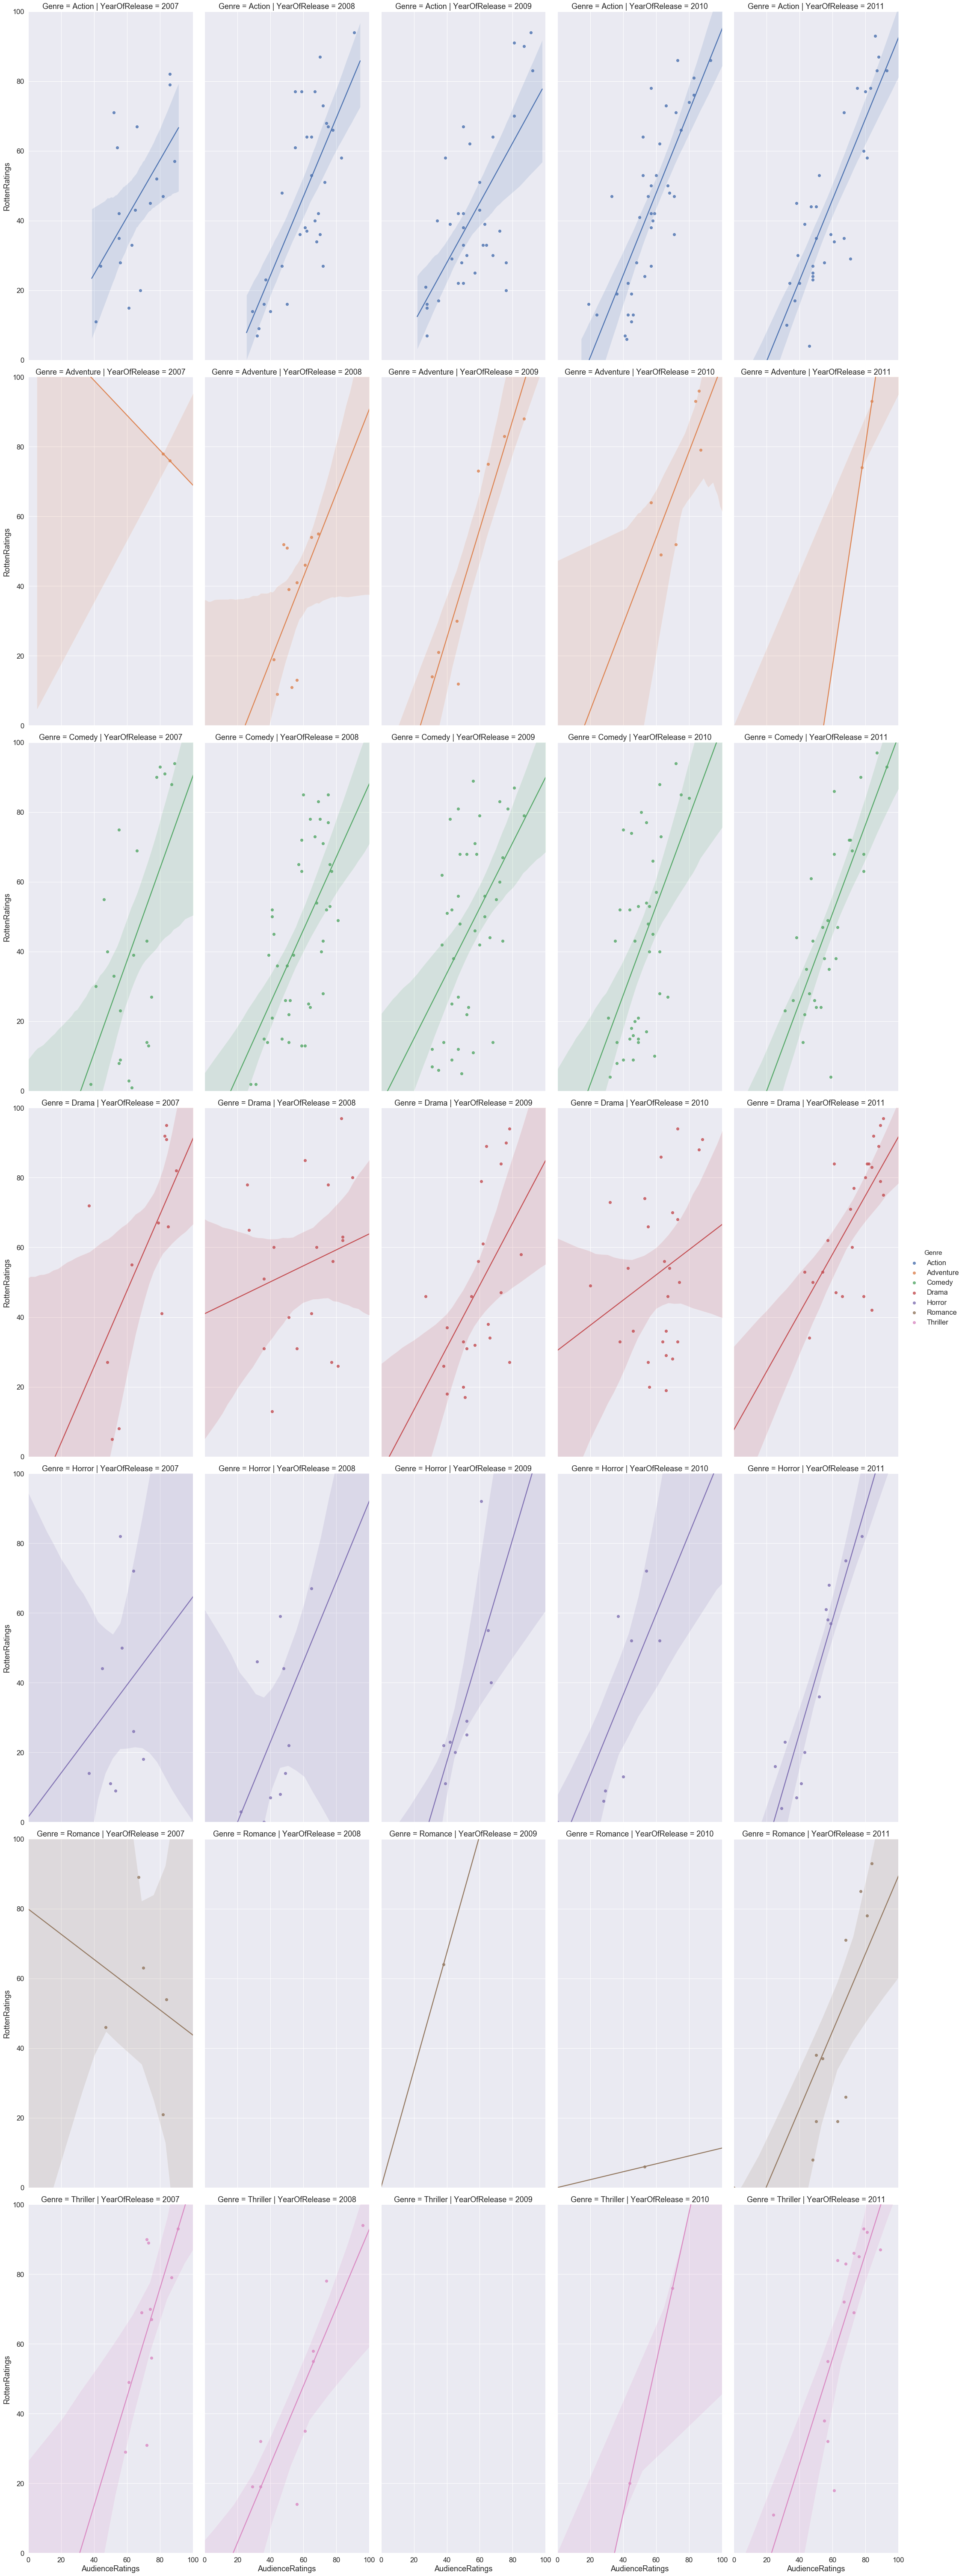

In [97]:
sbs.set_style('whitegrid')
sbs.set(font_scale=1.5)
fg = sbs.FacetGrid(critic,row='Genre',col='YearOfRelease',hue='Genre',height=12,aspect=0.5)
#kws = dict(s=100,linewidth=4)
fg.map(sbs.regplot,'AudienceRatings','RottenRatings')
fg.set(xlim=(0,100),ylim=(0,100))
fg.add_legend()

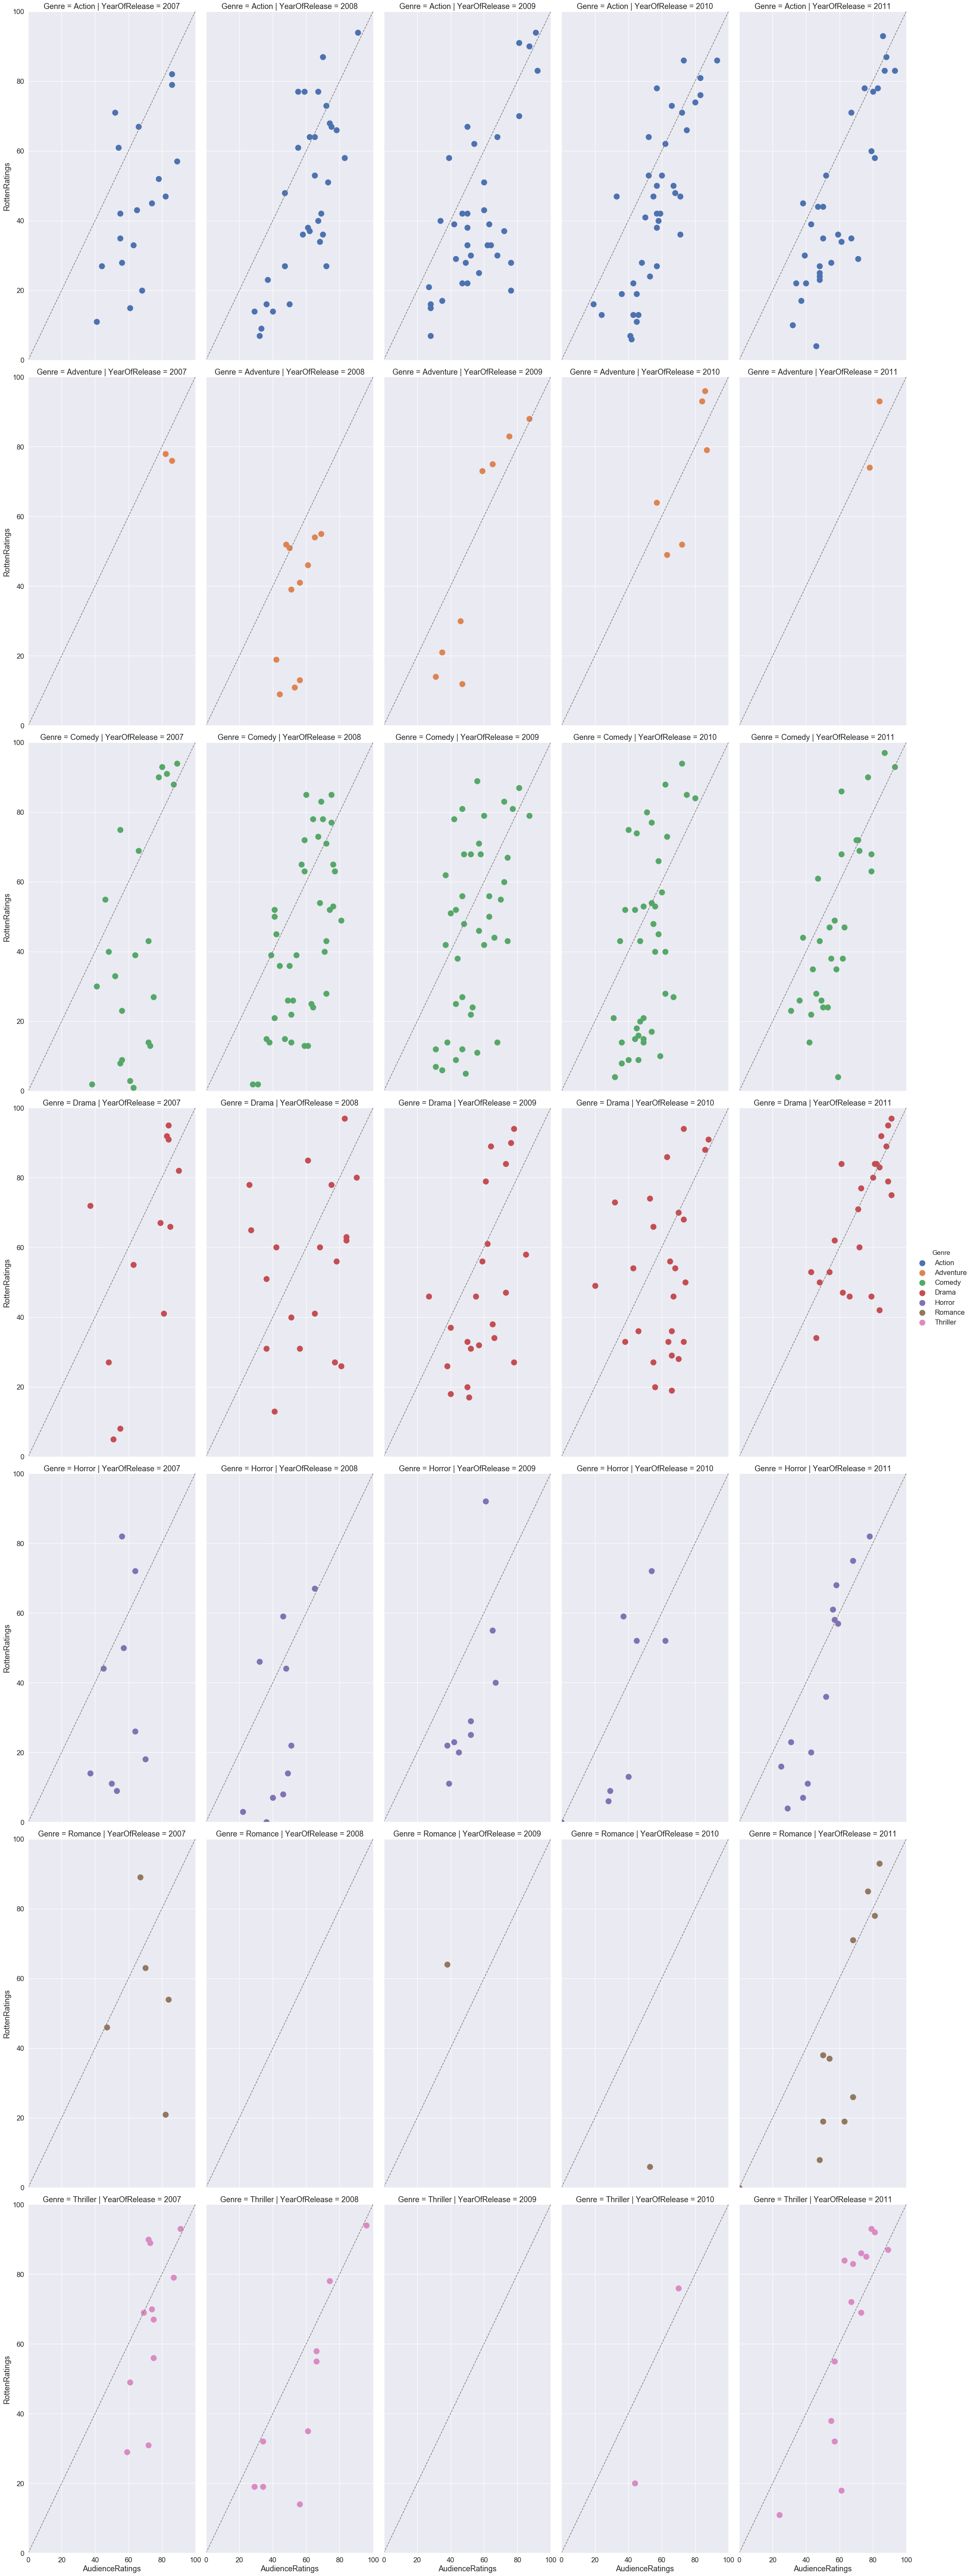

In [102]:
sbs.set_style('whitegrid')
sbs.set(font_scale=1.5)
fg = sbs.FacetGrid(critic,row='Genre',col='YearOfRelease',hue='Genre',height=12,aspect=0.5)
kws = dict(s=100,linewidth=4)
fg.map(plt.scatter,'AudienceRatings','RottenRatings',**kws)
fg.set(xlim=(0,100),ylim=(0,100))
fg.add_legend()

for fig in fg.axes.flat:
    fig.plot((0,100),(0,100),c='gray',ls='--')
    

---
Dashboard
---

In [155]:
from matplotlib import pyplot as plt
import matplotlib._color_data as mcd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[(-30, 140)]

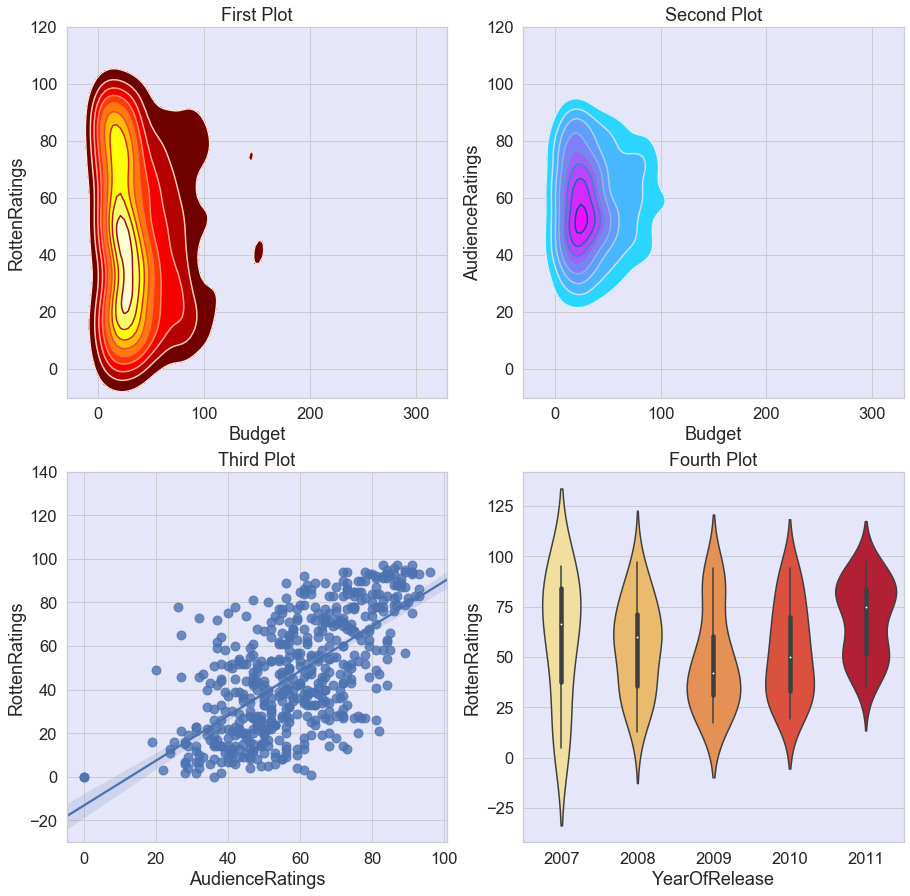

In [157]:
sns.set_style('whitegrid',{"axes.facecolor":mcd.CSS4_COLORS['lavender']})
f,ax = plt.subplots(2,2,figsize=(15,15),)
# Adding Plots
#--- Plot1
kd1 = sbs.kdeplot(critic.Budget,critic.RottenRatings,shade=True,\
                  shade_lowest=False,cmap='hot',ax=ax[0,0])
kd1b = sbs.kdeplot(critic.Budget,critic.RottenRatings,cmap='Reds',ax=ax[0,0])
#--- Plot2
kd2 = sbs.kdeplot(critic.Budget,critic.AudienceRatings,shade=True,\
                  shade_lowest=False,cmap='cool',ax=ax[0,1])
kd2b = sbs.kdeplot(critic.Budget,critic.AudienceRatings,cmap='Blues',ax=ax[0,1])
#--- Plot 3
j1 = sbs.regplot(data=critic, x='AudienceRatings',y='RottenRatings',scatter_kws={"s": 80,},\
                 ax=ax[1,0])
#--- Plot 4
b1 = sbs.violinplot(data=critic[critic['Genre']=='Drama'],x='YearOfRelease',\
                    y='RottenRatings',palette="YlOrRd",ax=ax[1,1])

## Example to add plt plots using the axes object
#ax[1,1].hist(critic.AudienceRatings)


#--- Set Title for plots
ax[0,0].title.set_text('First Plot')
ax[0,1].title.set_text('Second Plot')
ax[1,0].title.set_text('Third Plot')
ax[1,1].title.set_text('Fourth Plot')

#--- Xllim for plot 1,2
kd1.set(ylim=(-10,120))
kd2.set(ylim=(-10,120))
j1.set(ylim=(-30,140))
#b1.set(ylim=(-30,140))


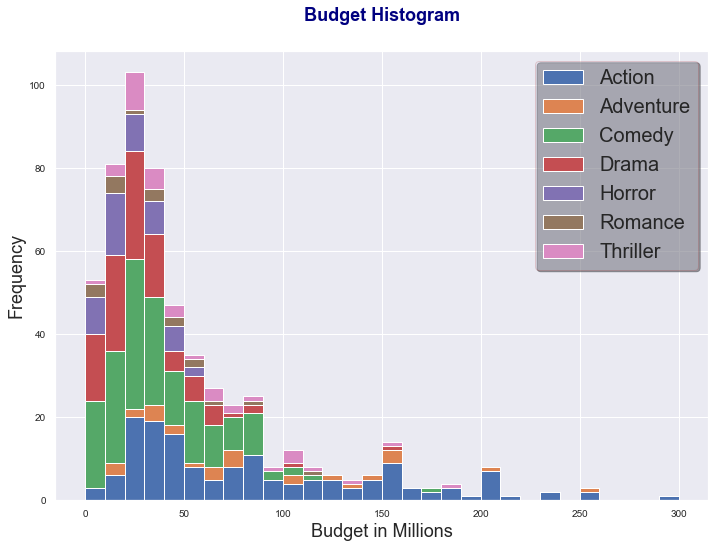

In [208]:
def histGenere(data,genere):
    genlist = []
    for type in genere:
        genlist.append(data[data['Genre']==type].Budget)
    myhist = plt.hist(genlist,stacked=True,label=genere,bins=30,rwidth=1)
    plt.title('Budget Histogram',color=mcd.CSS4_COLORS['navy'],weight='bold',pad=30)
    plt.xlabel('Budget in Millions')
    plt.ylabel('Frequency')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(prop={'size':20},facecolor='lavender',shadow=True,framealpha=0.2)
    plt.show()
    
sbs.set_style('darkgrid')
fig,ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
histGenere(critic,critic.Genre.cat.categories)
